# Communicate-Data-Findings-Ford-GoBike-System
## by Mohamed Abdelkader

## Preliminary Wrangling
> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. <br>
> It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. <br>
> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area..

In [70]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [71]:
# loading the dataset 
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [72]:
# showing first 8 rows of data 
df.head(8)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No


### lite dictionary for dataset

- where latitude is a geographic coordinate that specifies the north–south position of a point on the Earth's surface.
- where Longitude, is a geographic coordinate that specifies the east–west position of a point on the Earth's surface .
- A customer has purchased one product from you. They may never purchase another. A subscriber has purchased an ongoing commitment for a product with you. 
- the data contains a column called "bike_share_for_all_trip", which tracks members who are enrolled in the Bike Share for All program for low-income residents.

In [73]:
# showing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### there are Empty cells .. and features data types not appropriate for all variables.

In [74]:
# how many nulls dataset have ?
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

##### start_station_id  start_station_name  end_station_id  end_station_name has  197 nulls  
##### member_birth_year  member_gender  has  8265 nulls

In [75]:
# dataset dimentions 
df.shape

(183412, 16)

In [76]:
# columns data types 
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

### What is the structure of your dataset?

> 16 features of 183412 records .<br> 
<br> 
duration_sec                 int64<br> 
start_time                  object<br> 
end_time                    object<br> 
start_station_id           float64<br> 
start_station_name          object<br> 
start_station_latitude     float64<br> 
start_station_longitude    float64<br> 
end_station_id             float64<br> 
end_station_name            object<br> 
end_station_latitude       float64<br> 
end_station_longitude      float64<br> 
bike_id                      int64<br> 
user_type                   object<br> 
member_birth_year          float64<br> 
member_gender               object<br> 
bike_share_for_all_trip     object<br> 
<br> 
where int64 float64 are Numeric variables and object is String ( categorical ).

### What is/are the main feature(s) of interest in your dataset?

> member_birth_year,duration_sec, member_gender, user_type, start_station_id, end_station_id, bike_share_for_all_trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec where it can be related to gender and age <br> 
> start_time, end_time where it can affect duration cause of traffic 

- please notice that some main features may affect other main features where are binding in same system.

# Cleaning Data

In [77]:
# first we will make a copy before cleaning cause me we use original data again 
ford_bike = df.copy()

In [78]:
#Removing useless features from the dataset for better analysis
df.drop([ 'end_station_latitude', 'end_station_longitude','start_station_latitude','bike_id','start_station_longitude'], axis=1, inplace=True)
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No


In [79]:
# Change data type start_time end_time from object to datetime.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [80]:
# change duration_sec to duration in minutes to be like daily used data by people
df['duration_sec'] = df['duration_sec']/60
df.rename(columns= {"duration_sec":"duration_min"}, inplace = True ) 

In [81]:
# make sure that changes are saved
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_min             183412 non-null  float64       
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183215 non-null  float64       
 6   end_station_name         183215 non-null  object        
 7   user_type                183412 non-null  object        
 8   member_birth_year        175147 non-null  float64       
 9   member_gender            175147 non-null  object        
 10  bike_share_for_all_trip  183412 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 15.4+ MB


In [82]:
# drop nulls where sum of nulls number is small number number comparaple to affecting our 183412 data badly 
df.dropna(inplace=True)

In [83]:
# check if still more nulls
df.isnull().sum()

duration_min               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [84]:
#check duplicates
df.duplicated().sum()

0

- ###### No nulls or duplicates

In [85]:
# describing fucncition can help in finding data need fix
df.describe()

,duration_min,start_station_id,end_station_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000
mean,11.733379,139.002126,136.604486,1984.803135
std,27.370082,111.648819,111.335635,10.118731
min,1.016667,3.000000,3.000000,1878.000000
25%,5.383333,47.000000,44.000000,1980.000000
50%,8.500000,104.000000,101.000000,1987.000000
75%,13.150000,239.000000,238.000000,1992.000000
max,1409.133333,398.000000,398.000000,2001.000000


- born year to be 1878 is soo old and must be droped 

In [86]:
df[df.member_birth_year == 1878]

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,24.566667,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15.0,San Francisco Ferry Building (Harry Bridges Pl...,386.0,24th St at Bartlett St,Customer,1878.0,Female,No


In [87]:
# dorpping member_birth_year == 1878
df.drop(27370,axis = 0 , inplace = True)

In [88]:
# cheking if max Age is normal 
df.describe()

,duration_min,start_station_id,end_station_id,member_birth_year
count,174951.000000,174951.000000,174951.000000,174951.000000
mean,11.733306,139.002835,136.603060,1984.803745
std,27.370143,111.648744,111.334357,10.115538
min,1.016667,3.000000,3.000000,1900.000000
25%,5.383333,47.000000,44.000000,1980.000000
50%,8.500000,104.000000,101.000000,1987.000000
75%,13.150000,239.000000,238.000000,1992.000000
max,1409.133333,398.000000,398.000000,2001.000000


- Ages still upnormal , I think if someone older than 90 won't ride a bike so I will drop Age > 90 

In [89]:
# Age of people > 90 where this data set is at 2019 as it's csv file name starts with 2019
Age_90 = 2019 - 90
Age_90

1929

In [90]:
# create data frame for AGE > 90
Age_90plus = df[(df.member_birth_year < 1929)]
Age_90plus

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1285,2.466667,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,173.0,Shattuck Ave at 55th St,Subscriber,1900.0,Male,Yes
10827,21.916667,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343.0,Bryant St at 2nd St,375.0,Grove St at Masonic Ave,Subscriber,1900.0,Male,No
16087,18.850000,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375.0,Grove St at Masonic Ave,36.0,Folsom St at 3rd St,Subscriber,1900.0,Male,No
17981,6.100000,2019-02-26 19:53:38.528,2019-02-26 19:59:44.968,50.0,2nd St at Townsend St,21.0,Montgomery St BART Station (Market St at 2nd St),Subscriber,1920.0,Male,No
18885,7.200000,2019-02-26 17:48:59.016,2019-02-26 17:56:11.370,21.0,Montgomery St BART Station (Market St at 2nd St),50.0,2nd St at Townsend St,Subscriber,1920.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...
173711,16.550000,2019-02-03 09:45:30.464,2019-02-03 10:02:04.169,375.0,Grove St at Masonic Ave,36.0,Folsom St at 3rd St,Subscriber,1900.0,Male,No
177708,25.450000,2019-02-01 19:09:28.387,2019-02-01 19:34:55.963,343.0,Bryant St at 2nd St,375.0,Grove St at Masonic Ave,Subscriber,1900.0,Male,No
177885,8.616667,2019-02-01 18:38:40.471,2019-02-01 18:47:18.392,25.0,Howard St at 2nd St,30.0,San Francisco Caltrain (Townsend St at 4th St),Subscriber,1902.0,Female,No
182830,7.133333,2019-02-01 07:45:05.934,2019-02-01 07:52:14.922,284.0,Yerba Buena Center for the Arts (Howard St at ...,67.0,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,1901.0,Male,No


- 76 rows of users above 90 years old and that hard to find such old person using bike so I think it's false in data and I will drop them .

In [91]:
# droping AGE > 90 
df.drop(df[(df.member_birth_year < 1929 )].index, inplace = True)

In [92]:
# make sure all ages are < 90
df.describe()

,duration_min,start_station_id,end_station_id,member_birth_year
count,174875.000000,174875.000000,174875.000000,174875.000000
mean,11.733800,138.981141,136.604655,1984.839726
std,27.375632,111.637185,111.333687,9.968641
min,1.016667,3.000000,3.000000,1930.000000
25%,5.383333,47.000000,44.000000,1980.000000
50%,8.500000,104.000000,101.000000,1987.000000
75%,13.150000,239.000000,238.000000,1992.000000
max,1409.133333,398.000000,398.000000,2001.000000


In [93]:
# checking min member_birth_year
Min_Age = 2019 - 1930 
Min_Age

89

- Minimum age now 89 which is accepted some how for me .
- but I want make age in years not birth year to be easier to visualize . ( will do it next cell)

In [94]:
# make age in years not birth year to be easier to visualize
df['Age'] = 2019 - df.member_birth_year

In [95]:
# show Age after edit
df.Age.head(3)

0    35.0
2    47.0
3    30.0
Name: Age, dtype: float64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Age plotting :

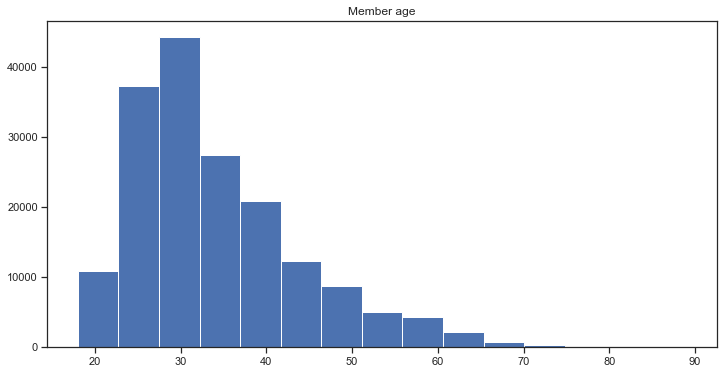

In [96]:
plt.figure(figsize=(12,6))
plt.hist(df['Age'],bins = 15);
plt.title('Member age');

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

- most of bike users are around 30 and the more old age the less users ..
- as we see plot is right skewed and we can make log transform to make it normal distributed .

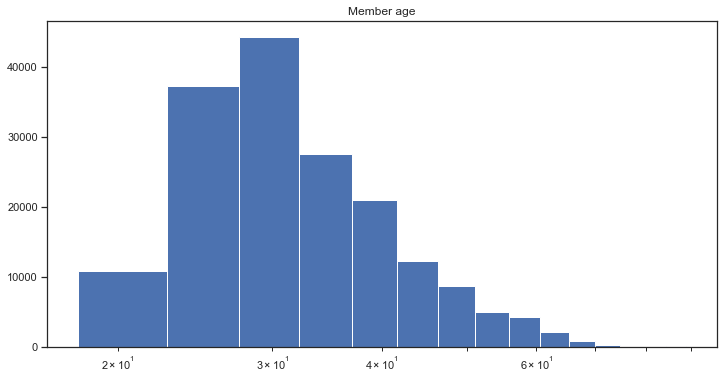

In [97]:
# plt.xscale('log') as mentioned in class to make logistic transform:
plt.figure(figsize=(12,6))
plt.hist(df['Age'],bins = 15);
plt.title('Member age');
plt.xscale('log');
# as we see it became more normalized

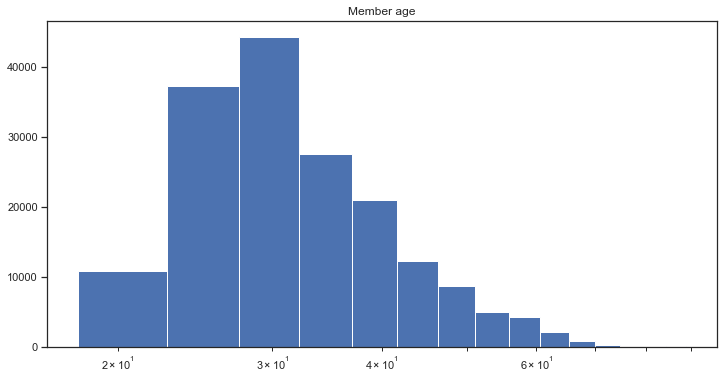

In [98]:
# plt.xscale('log') as mentioned in class to make logistic transform:
plt.figure(figsize=(12,6))
plt.hist(df['Age'],bins = 15);
plt.title('Member age');
plt.xscale('log');
# as we see it became more normalized

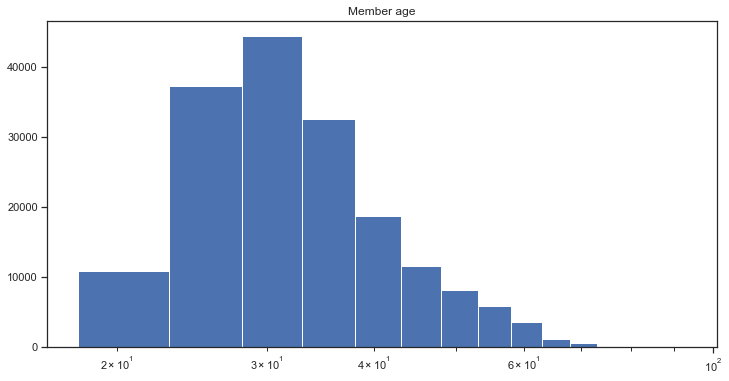

In [99]:
# Adding bins as in Univariant lesson class no 13 Scales and Transformations
bin_size = 5
bins = np.arange(df.Age.min(),df.Age.max() + bin_size, bin_size)
plt.figure(figsize=(12,6))
plt.hist(df['Age'],bins = bins);
plt.title('Member age');
plt.xscale('log');
# as we see it became more normalized

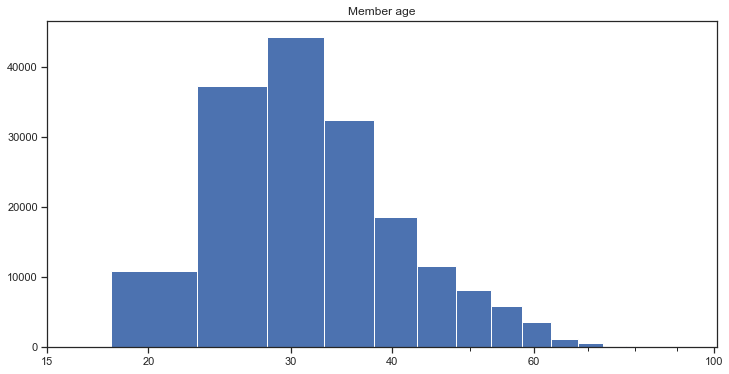

In [100]:
# Adding bins as in Univariant lesson class no 13 Scales and Transformations
# Adding ticks 
bin_size = 5
bins = np.arange(df.Age.min(),df.Age.max() + bin_size, bin_size)
ticks = [15,20,30,40,60,100]
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=(12,6))
plt.hist(df['Age'],bins = bins);
plt.title('Member age');
plt.xscale('log');
# as we see it became more normalized
plt.xticks(ticks, labels);
# now figure became much better visualizing 

### monthly and weakly and hourly usage of bikes :

In [101]:
# df.strftime('%B %d, %Y, %r') where B for month , d for day , Y for year , r for time
# df['day of week'] = df['date'].dt.strftime('%a')
# df.dt.hour returns the hours of the datetime.
df['start_month']=df['start_time'].dt.strftime('%B')
df['start_Weak_day']=df['start_time'].dt.strftime('%a')
df['start_hour']=df['start_time'].dt.hour
df['day_of_month']=df['start_time'].dt.strftime('%d')

In [102]:
# checking how many month in data
df.start_month.nunique()

1

- so we don't need month visualizing cause it's only one month which is FEB

In [103]:
#  how many days of weak in data?
df.start_Weak_day.nunique()

7

In [104]:
# how many unique hours in data?
df.start_hour.nunique()

24

- this data name is 201902-fordgobike-tripdata.csv so 02 is for Febrauary and this data is only for Feb all over the month days and times.

In [105]:
# define data frame for week days 
# as the start of is Mon day in America and weekends are Sat and Sun
daysofweak=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daysofweak

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

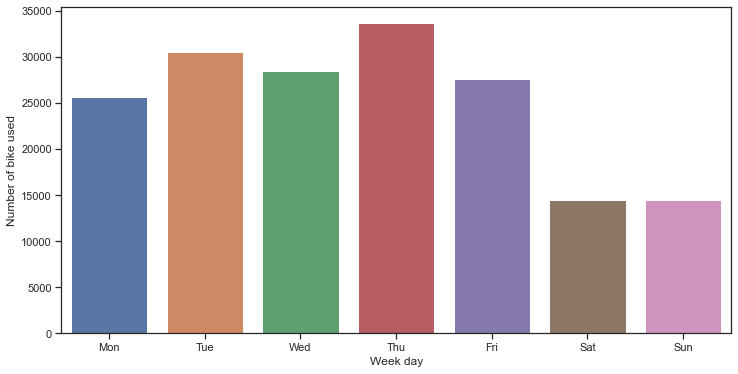

In [106]:
# seaborn.countplot Show the counts of observations in each categorical bin using bars
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_Weak_day',order=daysofweak);
plt.xlabel('Week day');
plt.ylabel('Number of bike used');

- it's max used in Thursday and least at weekend (SAT AND SUN).

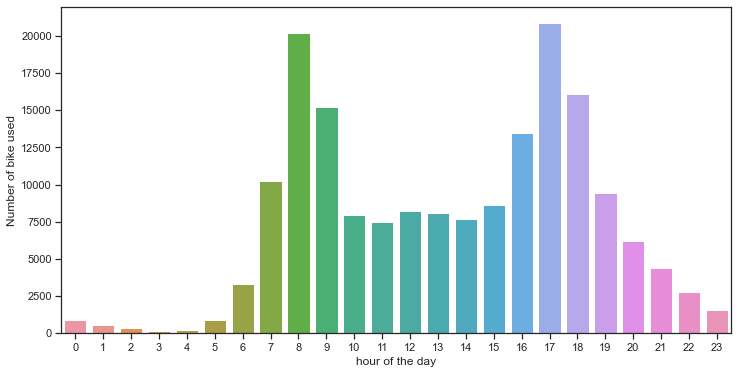

In [107]:
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_hour');
plt.xlabel('hour of the day');
plt.ylabel('Number of bike used');

- it's peak of using is at the early morning at 8 am where people foing to schools and work etc.. and at 5 pm while returing homes ..
- And ofc rarely used at night and early morning and average using is in day time between 8 am and 5 pm.

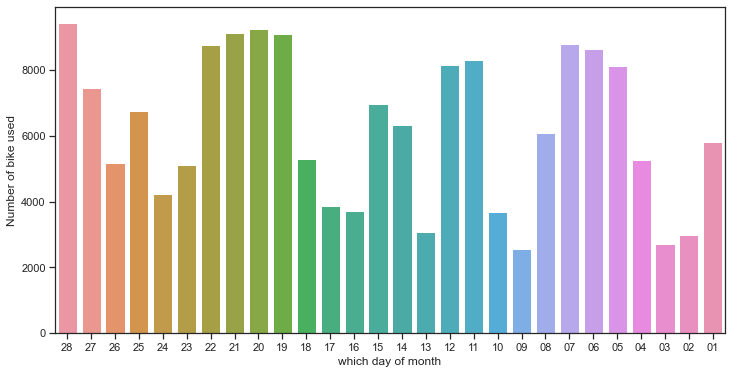

In [108]:
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='day_of_month');
plt.xlabel('which day of month');
plt.ylabel('Number of bike used');

- this proves what we assumed in weakly plotting cause ups and downs repeated every 7 days.

### Gender Discussion :

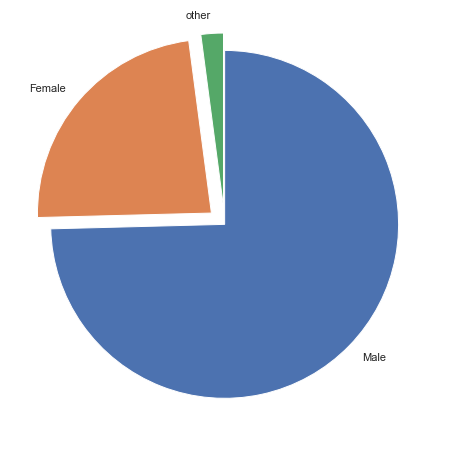

In [109]:
plt.figure(figsize=(8,8))
Gender_counts = df['member_gender'].value_counts()

plt.pie(Gender_counts, labels = ['Male','Female','other'], startangle = 90,explode =(0 , 0.1, 0.1)  ,
        counterclock = False);


- so most of Bike users are Men and here we can think than because Men bodies are more stronger than women so most men get more attracted to Bike using .

### Subscribers VS customers :

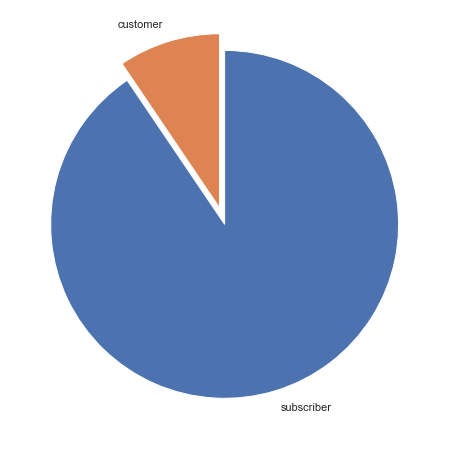

In [110]:
plt.figure(figsize=(8,8))
plt.pie(df['user_type'].value_counts(), labels = ['subscriber','customer'],
        explode =(0 , 0.1)  , startangle = 90, counterclock = False );

- so most of users are subscriber and not custmers and this means people are more satisfied with the price of subscribing and long term use instead of just one time , so I think company should make some discounts about 1 time use this can attract more subscribers also .

### bike_share_for_all_trip members :

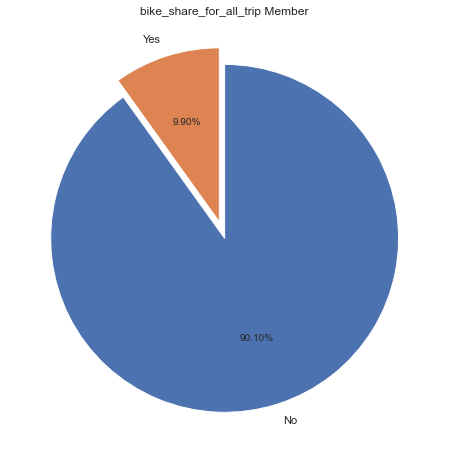

In [111]:
plt.figure(figsize=(8,8))
plt.pie(df['bike_share_for_all_trip'].value_counts(), labels = ['No','Yes'],
        explode =(0 , 0.1)  , startangle = 90, counterclock = False, autopct='%1.2f%%' );
plt.title('bike_share_for_all_trip Member');

- About 10 % of users are members who are enrolled in the Bike Share for All program .
- means also about 10 % are low income residents .

### duration_min Visualizing :

In [112]:
# we check the log of durations to add best bins
np.log(df['duration_min']).describe()

count    174875.000000
mean          2.140659
std           0.702708
min           0.016529
25%           1.683308
50%           2.140066
75%           2.576422
max           7.250730
Name: duration_min, dtype: float64

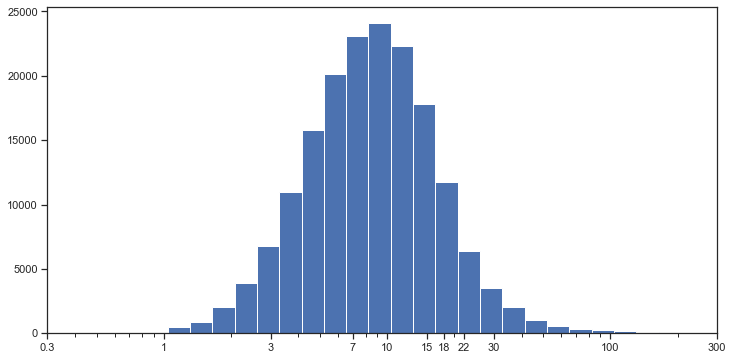

In [113]:
# here we will repeat as in Age but the max value we will choose the mean value 2.140659 as here high values so
# counts which can be ignored to make plot more displayful 
# Adding bins from min to 50% of log duration_min with step 0.1 and making 10 ** before np.arrange to add normal bins instead of logistic bins .
plt.figure(figsize=(12,6))
bins = 10 ** np.arange(0.016,2.14+0.1,0.1)
ticks = [0.3,1,3,7,10,15,18,22,30,100,300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);

- as we see most of repeated durations are in range of 6 to 18 mins

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I discussed the distribution of variables of interest above.
> yes there was unusual points and I did Log transform in Age because of right skew .
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Change data type start_time end_time from object to datetime to be able to take from it days of week and hours and days of months ... as above plots <Br>
> change duration_sec to duration in minutes to be like daily used data by people<Br>
> checking duplicates <Br>
> dropping unneeded columns <Br>
> dropping null records<Br>
> make sure no upnormal age in data set like 140 years old and above 90 years old users ..<Br>

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

- first we will see how duration_min can be related to  member_gender,user_type, Age,start_Weak_day and start_hour.
- But Duration of time is HIGH ranged to 1400 so will use part of one hour duration data to be more obvious to represent.

In [114]:
# create new df with duration max 40 mins as I tried many times and found that 40 mins is GREAT to show differences 
duration_min_lessthan_hour=  df[df.duration_min <= 40]

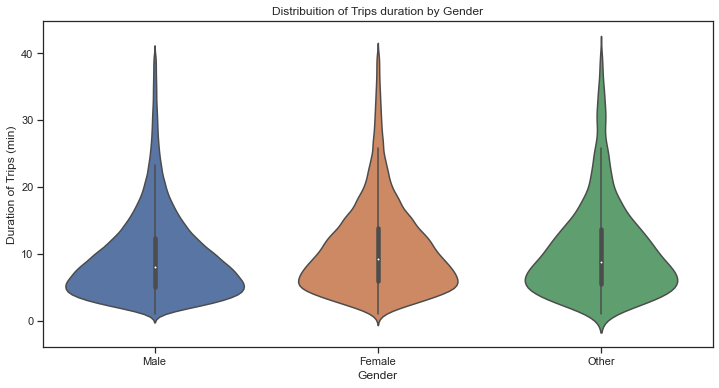

In [115]:
plt.figure(figsize=(12,6))
sb.violinplot(data = duration_min_lessthan_hour, x = 'member_gender', y = 'duration_min');
plt.title("Distribuition of Trips duration by Gender")
plt.xlabel('Gender');
plt.ylabel('Duration of Trips (min)');

- no noticibale between duration and Gender

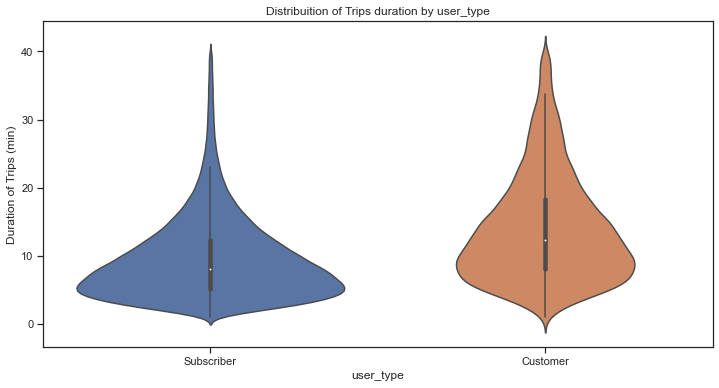

In [116]:
plt.figure(figsize=(12,6))
sb.violinplot(data = duration_min_lessthan_hour, x = 'user_type', y = 'duration_min');
plt.title("Distribuition of Trips duration by user_type")
plt.xlabel('user_type');
plt.ylabel('Duration of Trips (min)');

- some how customer who pay for one time trip use bike for more duration and subscriber can use it for so short trips even because the already paid, and thats what violin shows.

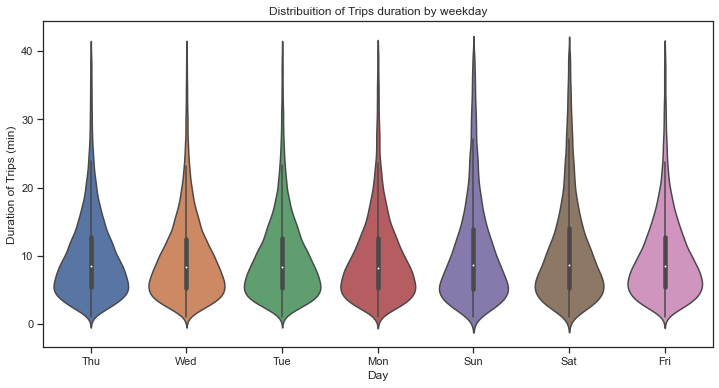

In [117]:
plt.figure(figsize=(12,6))
sb.violinplot(data = duration_min_lessthan_hour, x = 'start_Weak_day', y = 'duration_min');
plt.title("Distribuition of Trips duration by weekday")
plt.xlabel('Day');
plt.ylabel('Duration of Trips (min)');

- some users use long durations and this happens obviously in the SUN AND SAT (WEEKENDS) and thats normal .
- we can use box plot to show that difference:

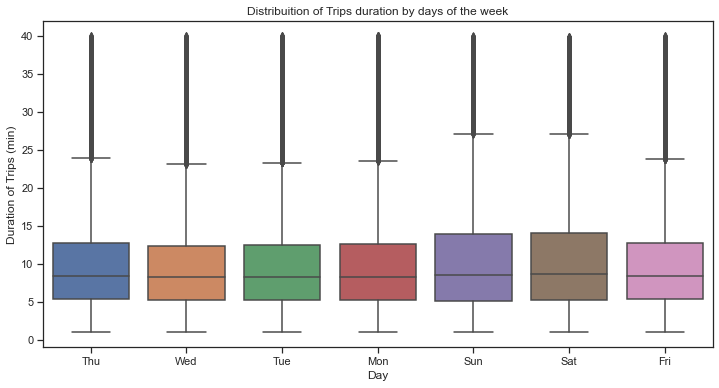

In [118]:
plt.figure(figsize=(12,6))
sb.boxplot(data = duration_min_lessthan_hour, x = 'start_Weak_day', y = 'duration_min');
plt.title("Distribuition of Trips duration by days of the week")
plt.xlabel('Day')
plt.ylabel('Duration of Trips (min)');

- yes the max value and the third quartile is higher in weekends.

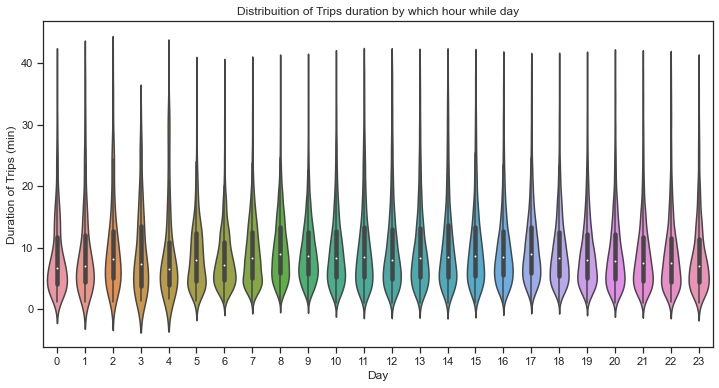

In [119]:
plt.figure(figsize=(12,6))
sb.violinplot(data = duration_min_lessthan_hour, x = 'start_hour', y = 'duration_min');
plt.title("Distribuition of Trips duration by which hour while day")
plt.xlabel('Day');
plt.ylabel('Duration of Trips (min)');

- we can say that almost no difference but at the mid day is more duration trips .

### relation between start station and end station 

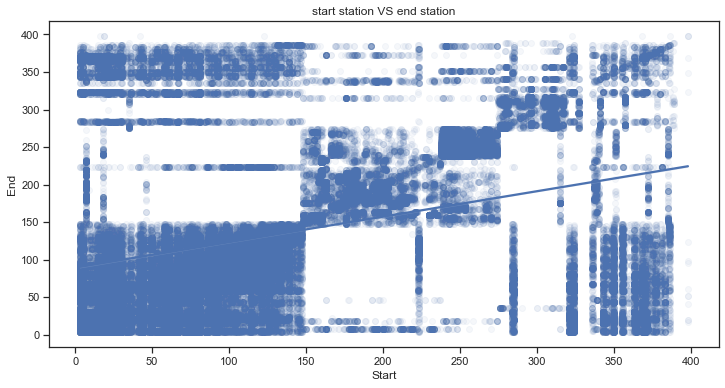

In [143]:
# after adding Jitter and transparenc as required
plt.figure(figsize=(12,6))
sb.regplot(data = df, x = 'start_station_id', y = 'end_station_id', x_jitter =0.2, scatter_kws = {'alpha' : 1/20});
plt.title("start station VS end station")
plt.xlabel('Start');
plt.ylabel('End');

- as we see that most users of first 150 stations users ending at the same 150 stations.
- while stations starting from ID 150 to 270 ending at the same period of stations.
- we can say that that these groups of stations are in cities and have long high way between them .. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> as explained above some how customer who pay for one time trip use bike for more duration and subscriber can use it for so short trips even because the already paid, and thats what violin shows. <br>
> some users use long durations and this happens obviously in the SUN AND SAT (WEEKENDS) and thats normal .<br>
>as we see that most users of first 150 stations users ending at the same 150 stations.
while stations starting from ID 150 to 270 ending at the same period of stations.
we can say that that these groups of stations are in cities and have long high way between them .. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> YES as discused above we see that start station and end station IDs are highly correlated then maybe we can search about relation between them .

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### we can start by guessing if there's relation between User type and Gender and Duration 

<Figure size 864x432 with 0 Axes>

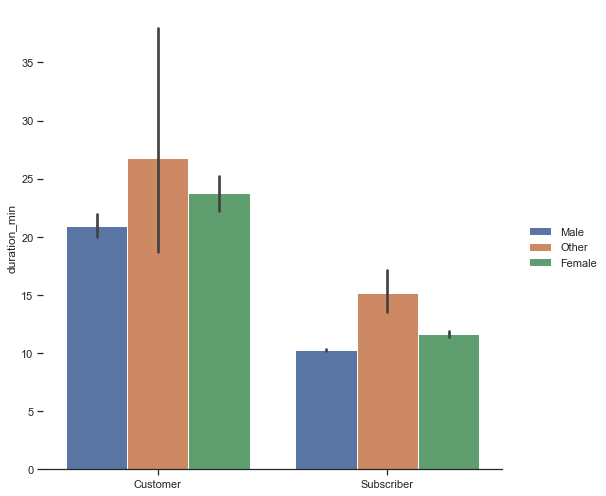

In [122]:
# from https://seaborn.pydata.org/examples/index.html we can choose favorites plots 
# hue is the third input ,
plt.figure(figsize=(12,6));
g = sb.catplot(
    data=df, kind="bar",
    x="user_type", y="duration_min", hue="member_gender",
     height=7
);
g.despine(left=True);
g.set_axis_labels("", "duration_min");
g.legend.set_title("");

- as we see no difference with gender and durations of Customers always higher..

### heat map to dataframe to check correlated variables 

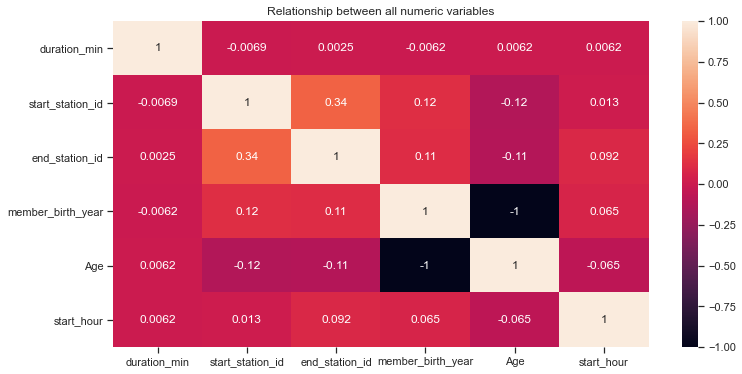

In [126]:
# while searching for new features which related or linked (correlated) we can make a heat map to dataframe.
# first we should make dataframe.corr() where is used to find the pairwise correlation of all columns in the dataframe.
# also df.corr() returns the 2D array required by heatmap and we add annot = True to show correlation values on every cell.
plt.figure(figsize=(12,6))
sb.heatmap(df.corr(),  annot = True)
plt.title('Relationship between all numeric variables');

- we see that start station and end station IDs are highly correlated then maybe we can search about relation between them .

### we can try with Duration and Gender and Age instead of user type 

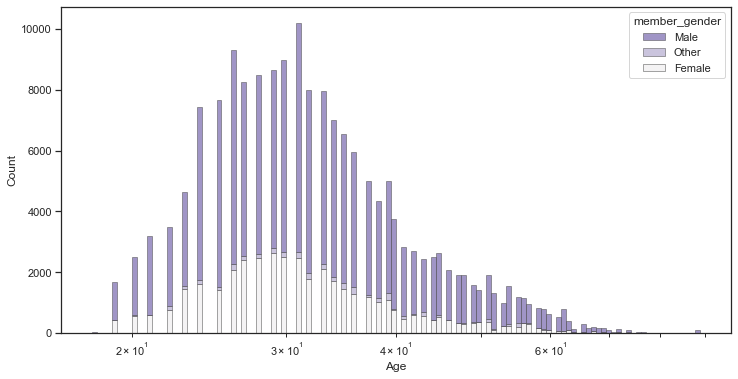

In [123]:
# as in this examble https://seaborn.pydata.org/examples/histogram_stacked.html
plt.figure(figsize=(12,6));
sb.set_theme(style="ticks")
sb.histplot(
    df,
    x="Age", hue="member_gender",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
);

- as we see Males always have higher durations and thirties ages are the longest time users.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> no difference with gender and durations of Customers always higher..<br
> Males always have higher durations and thirties ages are the longest time users.
> yes it would have been much easier if using multivariant instead of univariant.

### Were there any interesting or surprising interactions between features?

> really interesting is how multivariant can save effort and time.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

- ALL THANKS 
- please note I will remove quotes at the end of submission 

# Refrences

- https://datascienceplus.com/exploring-san-francisco-bay-areas-bike-share-system/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html
- https://stackoverflow.com/questions/37710397/python-datetime-weekday-strftime-vs-weekday
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.hour.html
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
- https://seaborn.pydata.org/examples/grouped_barplot.html
- https://seaborn.pydata.org/generated/seaborn.catplot.html